In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
# Data 
input_file = 'data_final.xlsx'
output_file = 'data_final_file.csv'
data = pd.read_excel(input_file)
data.to_csv(output_file, index=False)

In [3]:
data

,Universidad,Publicaciones,Ratio,Patentes
0,Asociación Civil Universidad de Ciencias y Hum...,413,0.184032,0
1,Facultad de Teología Pontificia y Civil de Lima,3,0.000000,0
2,Pontificia Universidad Católica del Perú,4202,0.393372,85
3,Universidad Andina del Cusco,37,0.285811,2
4,Universidad Antonio Ruiz de Montoya,24,0.164212,0
...,...,...,...,...
85,Universidad Ricardo Palma,403,0.470942,2
86,Universidad San Ignacio de Loyola S.R.L.,518,0.259578,2
87,Universidad Señor de Sipán S.A.C.,74,0.377377,1
88,Universidad Tecnológica de los Andes,37,0.350043,0


In [4]:
# Normalizar datos: x --> x-x_min/x_max-x_min

columns_to_normalize = data.iloc[:, 1:4]
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(columns_to_normalize)
data.iloc[:, 1:4] = data_normalized

In [5]:
data

,Universidad,Publicaciones,Ratio,Patentes
0,Asociación Civil Universidad de Ciencias y Hum...,0.064642,0.184032,0.000000
1,Facultad de Teología Pontificia y Civil de Lima,0.000470,0.000000,0.000000
2,Pontificia Universidad Católica del Perú,0.657693,0.393372,0.639098
3,Universidad Andina del Cusco,0.005791,0.285811,0.015038
4,Universidad Antonio Ruiz de Montoya,0.003756,0.164212,0.000000
...,...,...,...,...
85,Universidad Ricardo Palma,0.063077,0.470942,0.015038
86,Universidad San Ignacio de Loyola S.R.L.,0.081077,0.259578,0.015038
87,Universidad Señor de Sipán S.A.C.,0.011582,0.377377,0.007519
88,Universidad Tecnológica de los Andes,0.005791,0.350043,0.000000


# Dos regresoras: publicaciones y ratio alumnos en ciencias

In [6]:
#Regresoras 
X = data.iloc[:, 1:3]  

#Numero de clusters
kmeans = KMeans(n_clusters=3)  

kmeans.fit(X)
centroids = kmeans.cluster_centers_
data['Cluster'] = kmeans.labels_

# Centroides
print("Centroidess:")
print(centroids)

# Identificar que universidad va a que cluster
print("Universidades asignadas a los clusters:")
for i, (university, label) in enumerate(zip(data['Universidad'], kmeans.labels_)):
    print(f"'{university}' en el cluster {label}")

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroidess:
[[0.03047753 0.25326324]
 [0.03103701 0.59739642]
 [0.85652423 0.47362256]]
Universidades asignadas a los clusters:
'Asociación Civil Universidad de Ciencias y Humanidades' en el cluster 0
'Facultad de Teología Pontificia y Civil de Lima' en el cluster 0
'Pontificia Universidad Católica del Perú' en el cluster 2
'Universidad Andina del Cusco' en el cluster 0
'Universidad Antonio Ruiz de Montoya' en el cluster 0
'Universidad Autónoma de Ica S.A.C.' en el cluster 0
'Universidad Autónoma del Perú S.A.C.' en el cluster 0
'Universidad Católica de Santa María' en el cluster 1
'Universidad Católica de Trujillo Benedicto XVI' en el cluster 0
'Universidad Católica San Pablo' en el cluster 1
'Universidad Católica Santo Toribio de Mogrovejo' en el cluster 0
'Universidad Católica Sedes Sapientiae' en el cluster 0
'Universidad César Vallejo S.A.C.' en el cluster 0
'Universidad Científica del Sur S.A.C.' en el cluster 1
'Universidad Continental S.A.C.' en el cluster 1
'Universidad de Ci

In [13]:
X

,Publicaciones,Ratio
0,0.064642,0.184032
1,0.000470,0.000000
2,0.657693,0.393372
3,0.005791,0.285811
4,0.003756,0.164212
...,...,...
85,0.063077,0.470942
86,0.081077,0.259578
87,0.011582,0.377377
88,0.005791,0.350043


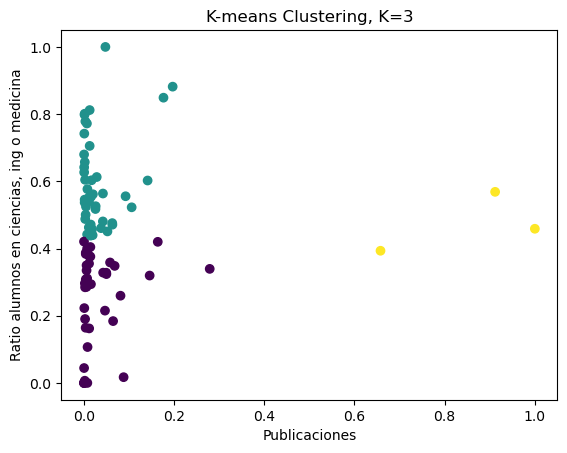

In [15]:
plt.scatter(data['Publicaciones'], data['Ratio'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Publicaciones')
plt.ylabel('Ratio alumnos en ciencias, ing o medicina')
plt.title('K-means Clustering, K=3')
plt.show()


# Método del codo: data set completo

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

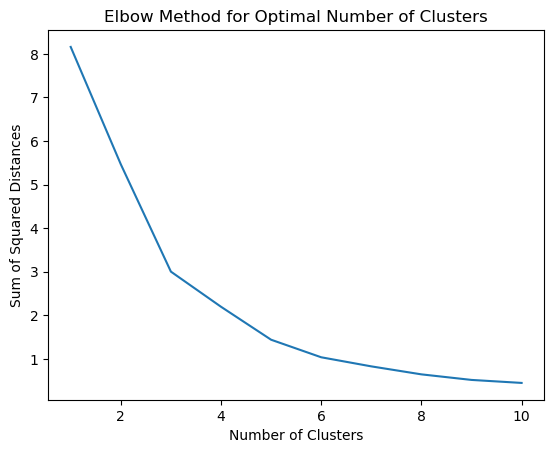

In [12]:

X1 = data.iloc[:, 1:4]  
sse = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)  

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [18]:
X1

,Publicaciones,Ratio,Patentes
0,0.064642,0.184032,0.000000
1,0.000470,0.000000,0.000000
2,0.657693,0.393372,0.639098
3,0.005791,0.285811,0.015038
4,0.003756,0.164212,0.000000
...,...,...,...
85,0.063077,0.470942,0.015038
86,0.081077,0.259578,0.015038
87,0.011582,0.377377,0.007519
88,0.005791,0.350043,0.000000


In [19]:

#Numero de clusters
kmeans = KMeans(n_clusters=3)  

kmeans.fit(X1)
centroids = kmeans.cluster_centers_
data['Cluster'] = kmeans.labels_

# Centroides
print("Centroidess:")
print(centroids)

# Identificar que universidad va a que cluster
print("Universidades asignadas a los clusters:")
for i, (university, label) in enumerate(zip(data['Universidad'], kmeans.labels_)):
    print(f"'{university}' en el cluster {label}")

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroidess:
[[0.02796728 0.24511427 0.02677425]
 [0.03006904 0.58393703 0.01904762]
 [0.68649241 0.56744449 0.52443609]]
Universidades asignadas a los clusters:
'Asociación Civil Universidad de Ciencias y Humanidades' en el cluster 0
'Facultad de Teología Pontificia y Civil de Lima' en el cluster 0
'Pontificia Universidad Católica del Perú' en el cluster 2
'Universidad Andina del Cusco' en el cluster 0
'Universidad Antonio Ruiz de Montoya' en el cluster 0
'Universidad Autónoma de Ica S.A.C.' en el cluster 0
'Universidad Autónoma del Perú S.A.C.' en el cluster 0
'Universidad Católica de Santa María' en el cluster 1
'Universidad Católica de Trujillo Benedicto XVI' en el cluster 0
'Universidad Católica San Pablo' en el cluster 1
'Universidad Católica Santo Toribio de Mogrovejo' en el cluster 0
'Universidad Católica Sedes Sapientiae' en el cluster 0
'Universidad César Vallejo S.A.C.' en el cluster 0
'Universidad Científica del Sur S.A.C.' en el cluster 1
'Universidad Continental S.A.C.' e

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


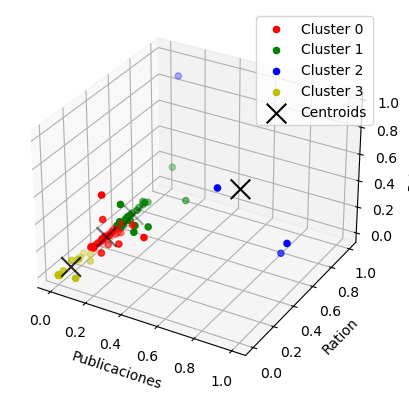

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
centroids = kmeans.cluster_centers_
data['Cluster'] = kmeans.labels_

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']  # colores

for cluster_label in range(4):  # k=4
    cluster_data = data[data['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Publicaciones'], cluster_data['Ratio'], cluster_data['Patentes'], c=colors[cluster_label], label=f'Cluster {cluster_label}')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='x', s=200, label='Centroids')

# Set labels
ax.set_xlabel('Publicaciones')
ax.set_ylabel('Ration')
ax.set_zlabel('Patentes')

plt.legend()
plt.show()

# Calinski Harabasz

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

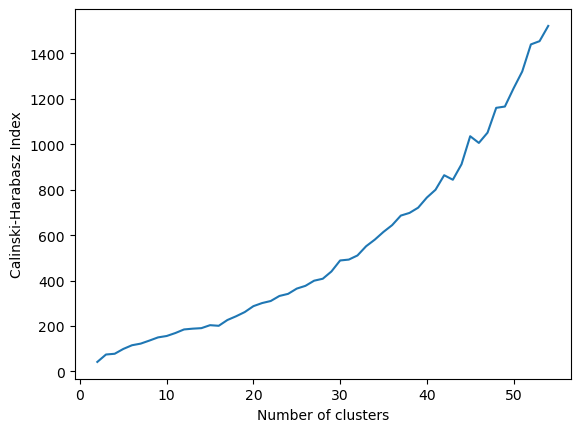

In [27]:
results = {}

for i in range(2, 55):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X1)
    ch_score = calinski_harabasz_score(X1, labels)  # This line calculates the CH index
    results[i] = ch_score

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()


C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

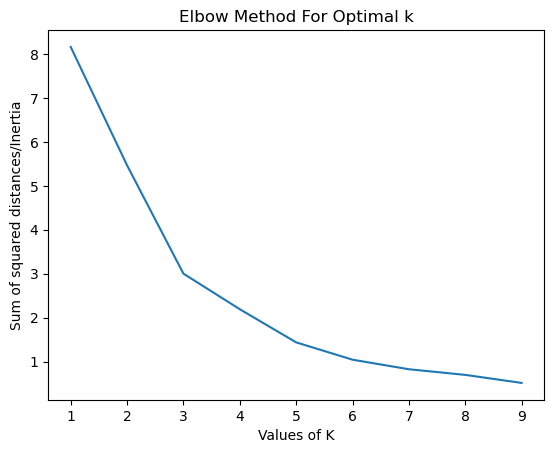

In [45]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()


C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

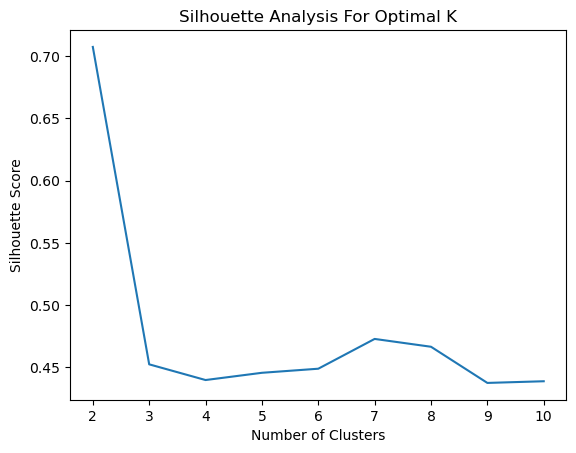

In [49]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X1, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()


# K-medians

In [8]:
def k_medians(X, k, max_iters=100):
 
    np.random.seed(0)
    n_samples, n_features = X.shape
    init_medians = X.iloc[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
    
        labels, distances = pairwise_distances_argmin_min(X, init_medians)
        

        new_medians = pd.DataFrame([X[labels == i].median() for i in range(k)])
        

        if new_medians.equals(init_medians):
            break
        
        init_medians = new_medians

    return labels, init_medians


In [9]:
X1 = data.iloc[:, 1:4]  
X1

In [13]:

X1 = pd.DataFrame({'Publicaciones': np.random.rand(100), 'Ratio': np.random.rand(100), 'Patentes': np.random.rand(100)})
    
# Specify the number of clusters (k)
k = 3
    
# Perform K-Medians clustering
labels, medians = k_medians(X1, k)
    
print("Cluster labels:", labels)
print("Cluster medians:")
print(medians)


Cluster labels: [1 0 2 0 2 1 1 2 0 0 2 1 2 2 0 2 1 1 1 1 1 2 2 0 1 1 0 0 0 2 2 1 1 1 2 0 0
 2 2 2 2 1 1 1 1 2 0 1 1 2 1 1 0 2 2 2 2 1 0 0 0 1 1 0 1 2 1 2 0 0 0 0 0 1
 0 2 1 2 2 1 2 2 1 0 1 1 1 2 2 2 0 2 1 1 1 1 2 2 0 2]
Cluster medians:
   Publicaciones     Ratio  Patentes
0       0.784291  0.228837  0.339430
1       0.615167  0.658512  0.846775
2       0.191673  0.730518  0.420763


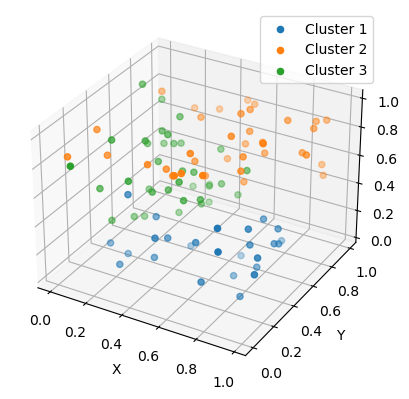

In [16]:
# Graficar en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
for i in range(k):
    cluster_points = X1[labels == i]
    ax.scatter(cluster_points['Publicaciones'], cluster_points['Ratio'], cluster_points['Patentes'], label=f'Cluster {i + 1}')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

# Logit

In [7]:
university_cluster = pd.DataFrame({
    'Universidad': data['Universidad'],
    'Cluster': data['Cluster']
})

In [18]:
university_cluster

,Universidad,Cluster
0,Asociación Civil Universidad de Ciencias y Hum...,0
1,Facultad de Teología Pontificia y Civil de Lima,0
2,Pontificia Universidad Católica del Perú,2
3,Universidad Andina del Cusco,0
4,Universidad Antonio Ruiz de Montoya,0
...,...,...
85,Universidad Ricardo Palma,1
86,Universidad San Ignacio de Loyola S.R.L.,0
87,Universidad Señor de Sipán S.A.C.,0
88,Universidad Tecnológica de los Andes,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, university_cluster['Cluster'], test_size=0.2, random_state=42)

# Crea y ajusta un modelo de regresión logística multinomial
logit_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logit_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = logit_model.predict(X_test)

# Evalúa el rendimiento del modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [21]:
X1

,const,Publicaciones,Ratio,Patentes
0,1.0,0.064642,0.184032,0.000000
1,1.0,0.000470,0.000000,0.000000
2,1.0,0.657693,0.393372,0.639098
3,1.0,0.005791,0.285811,0.015038
4,1.0,0.003756,0.164212,0.000000
...,...,...,...,...
85,1.0,0.063077,0.470942,0.015038
86,1.0,0.081077,0.259578,0.015038
87,1.0,0.011582,0.377377,0.007519
88,1.0,0.005791,0.350043,0.000000


# PCA

In [24]:
from sklearn.preprocessing import StandardScaler

# Estándariza las variables
scaler = StandardScaler()
X1_standardized = scaler.fit_transform(X1)

In [25]:
from sklearn.decomposition import PCA

# Crea una instancia de PCA
pca = PCA()

# Ajusta el PCA a los datos estandarizados
pca.fit(X1_standardized)

# Obtiene las cargas (pesos) de las componentes principales
component_loadings = pca.components_

# Calcula la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

In [26]:
weights = explained_variance[0] * component_loadings[0]

# Normaliza los pesos para que sumen 1
normalized_weights = weights / sum(weights)

In [27]:
X1['Innovacion'] = X1_standardized.dot(normalized_weights)

# El resultado se almacenará en una nueva columna llamada 'Innovacion'

# Visualiza el DataFrame resultante
print(X1)

    const  Publicaciones     Ratio  Patentes  Innovacion
0     1.0       0.064642  0.184032  0.000000   -0.335765
1     1.0       0.000470  0.000000  0.000000   -0.658767
2     1.0       0.657693  0.393372  0.639098    3.260396
3     1.0       0.005791  0.285811  0.015038   -0.348018
4     1.0       0.003756  0.164212  0.000000   -0.505698
..    ...            ...       ...       ...         ...
85    1.0       0.063077  0.470942  0.015038   -0.041289
86    1.0       0.081077  0.259578  0.015038   -0.182649
87    1.0       0.011582  0.377377  0.007519   -0.275419
88    1.0       0.005791  0.350043  0.000000   -0.336694
89    1.0       0.014713  0.438337  0.000000   -0.236478

[90 rows x 5 columns]


In [ ]:
# correlacion entre el cluster y el puntaje del PCA
# si tiene maestria, doctorado 0, 1, 2 [ultima variable] hasta 2020
# CFI, TLI y RMSEA
# .8 por encima, RMSEA cuanto error hay en la medicion: valores cercanos a 0.1 o menos esta bien
# correlation map  --> agregar correlacion al termino de error de esas 2 variables, al momento de estimar el modelo 
# ENHAO indice de calidad como se asocia con nivel de ingresos, empleo decente